In [1]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import geopandas as gpd

import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cf

import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable

In [2]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

Tr = [5,  10,  20,  50, 100, 200]
Fi = 1 - 1/np.array(Tr)

In [3]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [4]:
obs_base = os.path.join('/','media','arturo','T9','Data','Italy', 'stations', 'Italy_raingauges', 'QC_MIX')
dir_base = os.path.join('/','media','arturo','T9','Data','Italy')

In [5]:
ISO_names = pd.read_csv(os.path.join('/','media','arturo','T9','Data','Italy', 'stations', 'Italy_raingauges', 'ISO_IT_REGION_EN.csv'))
ISO_names["ISO_num"] = ISO_names["ISO"].str.split("-").str[1].astype(int)
ISO_names = ISO_names.sort_values("ISO_num").drop(columns="ISO_num").reset_index(drop=True)

In [6]:
def extract_all_quantiles(product):
    hdf5_file = os.path.join(dir_base,'statistics',f'statistics_obs_{product}.h5')
    data = pd.HDFStore(hdf5_file, mode='r')

    all_keys = data.keys()
    all_QUANTILES = [k for k in all_keys if k.endswith("/QUANTILES")]
    
    RE_raw = []
    RE_down = []

    for nn in range(len(all_QUANTILES)):
        DICT = data[all_QUANTILES[nn]]
        RE_raw_ = DICT.RE_raw.values[3]
        RE_down_ = DICT.RE_down.values[3]
    
        RE_raw.append(RE_raw_)
        RE_down.append(RE_down_)
    
    RE_raw = np.array(RE_raw)
    RE_down = np.array(RE_down)
    
    RE_raw = np.where(RE_raw >= 1.3, np.nan, RE_raw)
    RE_down = np.where(RE_down >= 1.3, np.nan, RE_down)
    
    return RE_raw, RE_down

In [7]:
IMERG_RE_raw, IMERG_RE_down = extract_all_quantiles('IMERG')
ERA5_RE_raw, ERA5_RE_down = extract_all_quantiles('ERA5')
CMORPH_RE_raw, CMORPH_RE_down = extract_all_quantiles('CMORPH')
MSWEP_RE_raw, MSWEP_RE_down = extract_all_quantiles('MSWEP')
GSMaP_RE_raw, GSMaP_RE_down = extract_all_quantiles('GSMaP')
CHIRPS_RE_raw, CHIRPS_RE_down = extract_all_quantiles('CHIRPS')
ENSEMBLE_RE_raw, ENSEMBLE_RE_down = extract_all_quantiles('ENSEMBLE_mean')

In [8]:
colors = ['royalblue','r', 'g', 'c', 'y', 'purple', 'orange', 'cyan']

../figures/Article_down/Products_DOWN_RE_dist_median.png


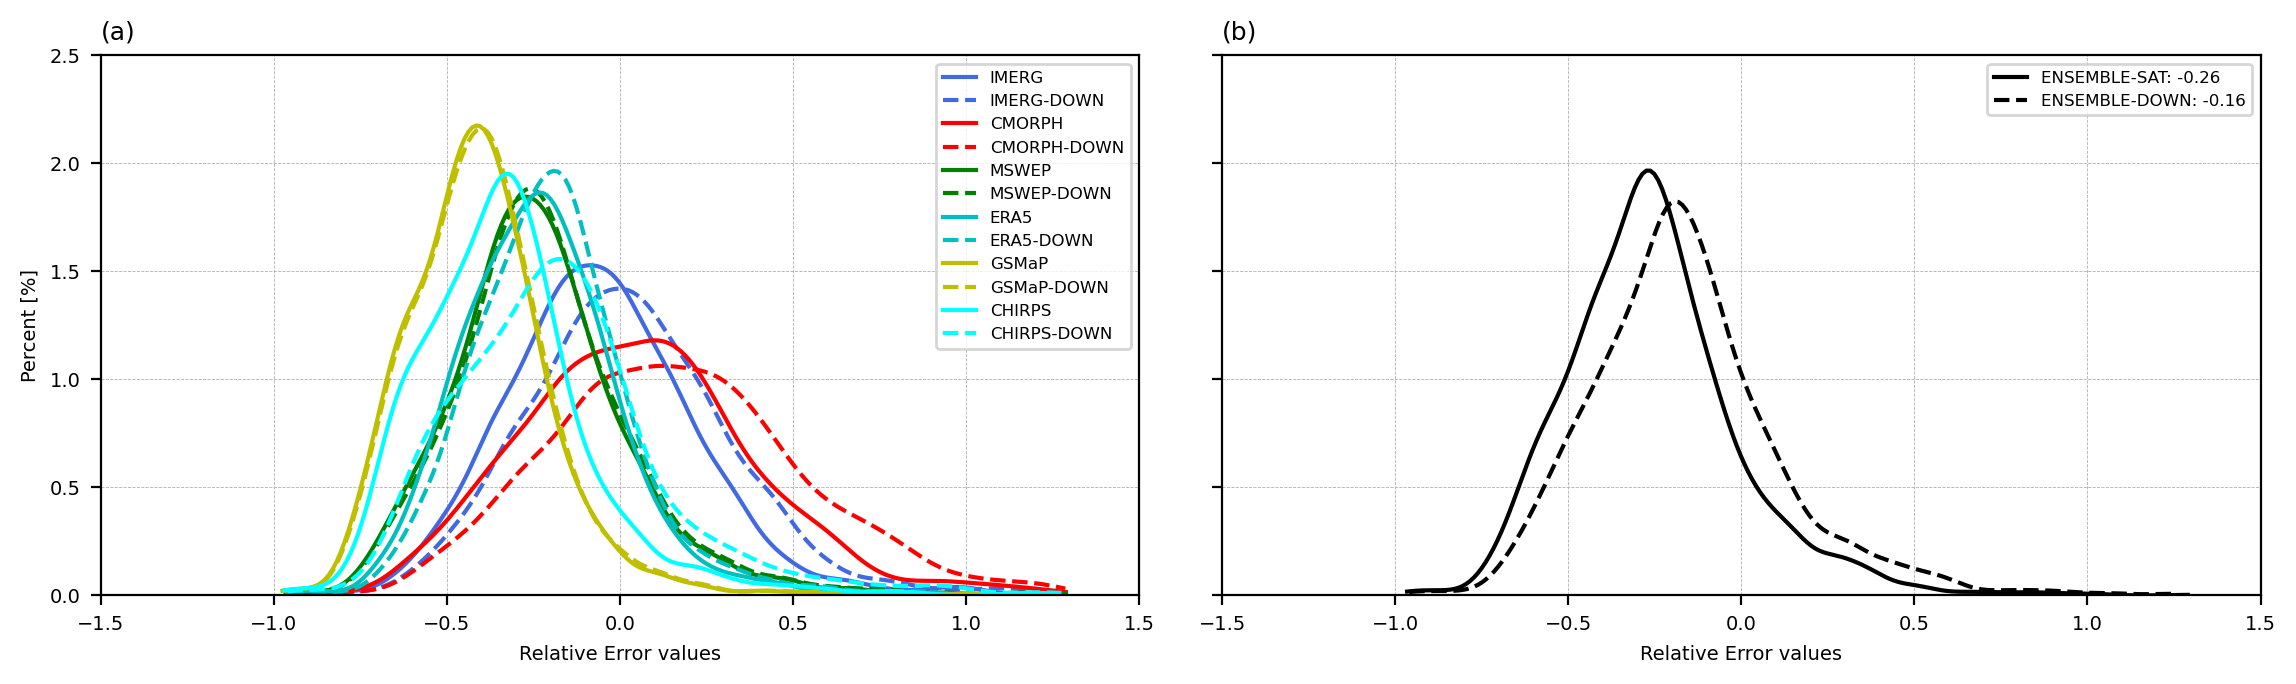

In [10]:
fig = plt.figure(figsize=(12,3),dpi=200)
gs = gridspec.GridSpec(1,2)

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])

sns.kdeplot(IMERG_RE_raw,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(IMERG_RE_raw)), np.nanmax(np.array(IMERG_RE_raw))))
sns.kdeplot(IMERG_RE_down,color=colors[0], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG-DOWN',
            clip=(np.nanmin(np.array(IMERG_RE_down)), np.nanmax(np.array(IMERG_RE_down))))

sns.kdeplot(CMORPH_RE_raw,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPH',
            clip=(np.nanmin(np.array(CMORPH_RE_raw)), np.nanmax(np.array(CMORPH_RE_raw))))
sns.kdeplot(CMORPH_RE_down,color=colors[1], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPH-DOWN',
            clip=(np.nanmin(np.array(CMORPH_RE_down)), np.nanmax(np.array(CMORPH_RE_down))))

sns.kdeplot(MSWEP_RE_raw,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'MSWEP',
            clip=(np.nanmin(np.array(MSWEP_RE_raw)), np.nanmax(np.array(MSWEP_RE_raw))))
sns.kdeplot(MSWEP_RE_down,color=colors[2], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'MSWEP-DOWN',
            clip=(np.nanmin(np.array(MSWEP_RE_down)), np.nanmax(np.array(MSWEP_RE_down))))

sns.kdeplot(ERA5_RE_raw,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ERA5',
            clip=(np.nanmin(np.array(ERA5_RE_raw)), np.nanmax(np.array(ERA5_RE_raw))))
sns.kdeplot(ERA5_RE_down,color=colors[3], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ERA5-DOWN',
            clip=(np.nanmin(np.array(ERA5_RE_down)), np.nanmax(np.array(ERA5_RE_down))))

sns.kdeplot(GSMaP_RE_raw,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP',
            clip=(np.nanmin(np.array(GSMaP_RE_raw)), np.nanmax(np.array(GSMaP_RE_raw))))
sns.kdeplot(GSMaP_RE_down,color=colors[4], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP-DOWN',
            clip=(np.nanmin(np.array(GSMaP_RE_down)), np.nanmax(np.array(GSMaP_RE_down))))

sns.kdeplot(CHIRPS_RE_raw,color=colors[7],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CHIRPS',
            clip=(np.nanmin(np.array(CHIRPS_RE_raw)), np.nanmax(np.array(CHIRPS_RE_raw))))
sns.kdeplot(CHIRPS_RE_down,color=colors[7], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CHIRPS-DOWN',
            clip=(np.nanmin(np.array(CHIRPS_RE_down)), np.nanmax(np.array(CHIRPS_RE_down))))

ax1.set_ylabel('Percent [%]',fontsize=7)
ax1.set_xlabel('Relative Error values',fontsize=7)
ax1.legend(fontsize=6, loc=0, ncol=1)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.5)
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title(f'(a)',fontsize=9, loc='left')

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 1])

sns.kdeplot(ENSEMBLE_RE_raw,color='k',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-SAT: {np.round(np.nanmean(ENSEMBLE_RE_raw),2)}',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_raw)), np.nanmax(np.array(ENSEMBLE_RE_raw))))
sns.kdeplot(ENSEMBLE_RE_down,color='k', linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-DOWN: {np.round(np.nanmean(ENSEMBLE_RE_down),2)}',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_down)), np.nanmax(np.array(ENSEMBLE_RE_down))))

ax1.set_xlabel('Relative Error values',fontsize=7)
ax1.legend(fontsize=6, loc=0, ncol=1)
ax1.grid(linewidth=0.3, linestyle='--')

ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.5)
ax1.set_yticklabels('')
ax1.set_ylabel('')
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title(f'(b)',fontsize=9, loc='left')

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.08, hspace=0.15)

salida = '../figures/Article_down/Products_DOWN_RE_dist_median.png'
print(salida)
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)